<a href="https://colab.research.google.com/github/maheenfatimacse/pythonDA/blob/main/maheenDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')
print(data.head(5))
print(data.tail(5))
data.info()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace = True)
data['Cabin'] = data['Cabin'].notnull().astype(int)
inplace = True
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace = True)
data.isnull().sum()
duplicates = data.duplicated()
my_duplicate = duplicates.sum()
print(my_duplicate)


0


In [ ]:
duplicates = data.duplicated()
data.drop_duplicates(inplace = True)
num_duplicates = duplicates.sum()
print(num_duplicates)

0


In [ ]:
'''
from scipy import stats

z_scores = stats.zscore(data['PassengerId'])
data = data[(z_scores < 3)]
    #handling outliers

#to check the extreme or unusual values in multiple cols
from scipy import stats

# Calculate z-scores for all columns
z_scores = stats.zscore(data)

# Create a boolean mask for outliers
outliers_mask = (z_scores > 3) | (z_scores < -3)

# Filter out rows with outliers
data = data[~outliers_mask.any(axis=1)]

'''



TypeError: ignored

SORTING

For example, if you have a dataset with columns 'Name', 'Age', and 'Salary', sorting the dataset based on the 'Age' column would rearrange the rows so that the individuals are ordered by their ages. The data within each row (e.g., the name, age, and salary values) remain intact, but the order of the rows changes.

In other words, sorting data does not change or modify the actual values within each row. It only changes the order in which the rows appear in the dataset, based on the specified column(s) and sorting criteria.

By sorting the data, you can gain insights such as identifying the highest or lowest values, finding patterns or trends, grouping similar values together, or facilitating easier data exploration and analysis.






In [ ]:

data = data.sort_index(ascending=[True])
'''
data = data.sort_values(['PassengerId'], ascending=[ True])
data = data.sort_values(['Pclass'],ascending =[ True])
'''
data = data.sort_values(['Name'],ascending =[ True])
data['Age'] = data['Age'].astype(int)
data.head(5)
'''

for column in data.columns:
    data[column] = data[column].sort_values(ascending=True)
data.head()
'''

'\n\nfor column in data.columns:\n    data[column] = data[column].sort_values(ascending=True)\ndata.head()\n'

data visualisation

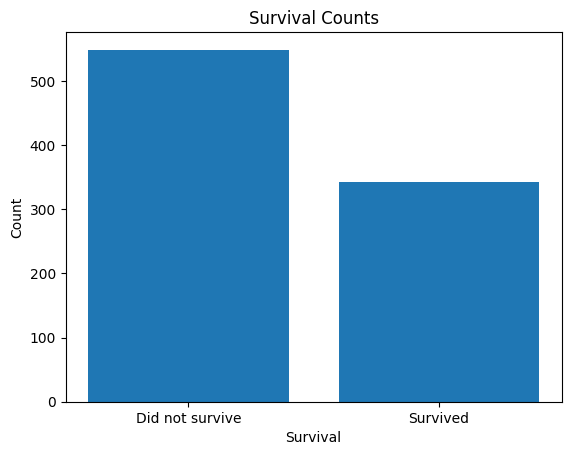

In [ ]:
survived_counts = data['Survived'].value_counts()
plt.bar(survived_counts.index, survived_counts.values)
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()

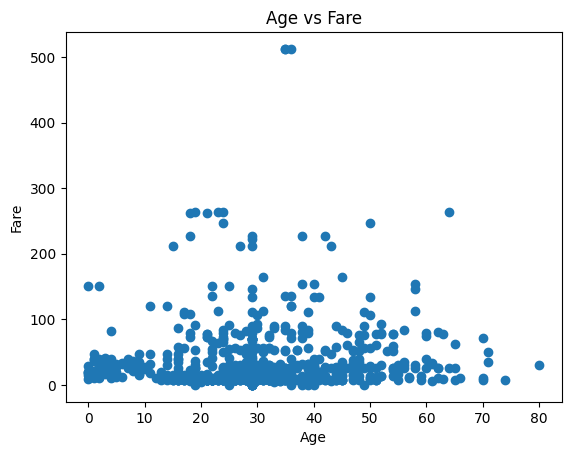

In [ ]:
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

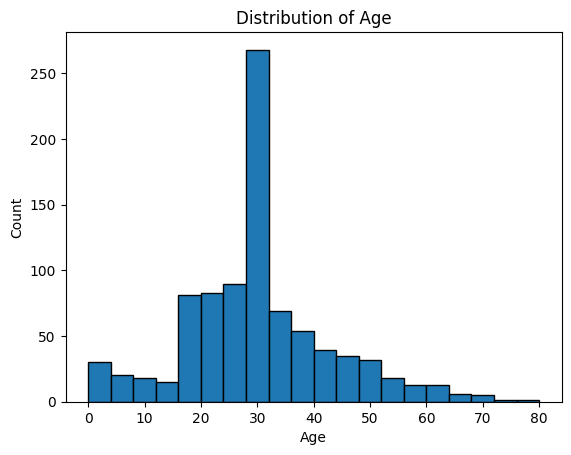

In [ ]:
plt.hist(data['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()
